In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding='latin1')
data.tail()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class
180518,PAYMENT,4,4,168.949997,383.980011,Shipping on time,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 18:54,Standard Class


In [3]:
required_columns = [
        'Days for shipping (real)',
        'Days for shipment (scheduled)',
        'Shipping Mode',
        'Order Status',
        'Order Region',
        'Delivery Status',
        'Order State',
        'Order Item Quantity',
        'Order Item Discount Rate',
        'Order Item Profit Ratio',
        'Product Price',
        'Category Name',
        'shipping date (DateOrders)',
        'Late_delivery_risk'
]

In [5]:
new_data = data[required_columns].to_csv('new_data.csv', index=False)

In [6]:
data_final = pd.read_csv('/content/new_data.csv')
data_final.head()

,Days for shipping (real),Days for shipment (scheduled),Shipping Mode,Order Status,Order Region,Delivery Status,Order State,Order Item Quantity,Order Item Discount Rate,Order Item Profit Ratio,Product Price,Category Name,shipping date (DateOrders),Late_delivery_risk
0,3,4,Standard Class,COMPLETE,Southeast Asia,Advance shipping,Java Occidental,1,0.04,0.29,327.75,Sporting Goods,02-03-2018 22:56,0
1,5,4,Standard Class,PENDING,South Asia,Late delivery,Rajastán,1,0.05,-0.80,327.75,Sporting Goods,1/18/2018 12:27,1
2,4,4,Standard Class,CLOSED,South Asia,Shipping on time,Rajastán,1,0.06,-0.80,327.75,Sporting Goods,1/17/2018 12:06,0
3,3,4,Standard Class,COMPLETE,Oceania,Advance shipping,Queensland,1,0.07,0.08,327.75,Sporting Goods,1/16/2018 11:45,0
4,2,4,Standard Class,PENDING_PAYMENT,Oceania,Advance shipping,Queensland,1,0.09,0.45,327.75,Sporting Goods,1/15/2018 11:24,0


DATA PREPROCESSING

In [7]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipping (real)       180519 non-null  int64  
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   Shipping Mode                  180519 non-null  object 
 3   Order Status                   180519 non-null  object 
 4   Order Region                   180519 non-null  object 
 5   Delivery Status                180519 non-null  object 
 6   Order State                    180519 non-null  object 
 7   Order Item Quantity            180519 non-null  int64  
 8   Order Item Discount Rate       180519 non-null  float64
 9   Order Item Profit Ratio        180519 non-null  float64
 10  Product Price                  180519 non-null  float64
 11  Category Name                  180519 non-null  object 
 12  shipping date (DateOrders)    

In [8]:
data_final.isnull().sum()

,0
Days for shipping (real),0
Days for shipment (scheduled),0
Shipping Mode,0
Order Status,0
Order Region,0
Delivery Status,0
Order State,0
Order Item Quantity,0
Order Item Discount Rate,0
Order Item Profit Ratio,0


There are no Missing values

In [9]:
data_final.dtypes

,0
Days for shipping (real),int64
Days for shipment (scheduled),int64
Shipping Mode,object
Order Status,object
Order Region,object
Delivery Status,object
Order State,object
Order Item Quantity,int64
Order Item Discount Rate,float64
Order Item Profit Ratio,float64


EDA

In [10]:
data_final['Late_delivery_risk'].value_counts()

,count
Late_delivery_risk,
1,98977
0,81542


1 --> Late
0 --> On-time

Delay Rate must be the mean of two

In [12]:
delay_rate = data_final['Late_delivery_risk'].mean()
print(delay_rate)

0.5482913155955883


It tells us that about 55% of all the orders had a late delivery and 45% were on time

In [15]:
data_final.describe()

,Days for shipping (real),Days for shipment (scheduled),Order Item Quantity,Order Item Discount Rate,Order Item Profit Ratio,Product Price,Late_delivery_risk
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,3.497654,2.931847,2.127638,0.101668,0.120647,141.232550,0.548291
std,1.623722,1.374449,1.453451,0.070415,0.466796,139.732492,0.497664
min,0.000000,0.000000,1.000000,0.000000,-2.750000,9.990000,0.000000
25%,2.000000,2.000000,1.000000,0.040000,0.080000,50.000000,0.000000
50%,3.000000,4.000000,1.000000,0.100000,0.270000,59.990002,1.000000
75%,5.000000,4.000000,3.000000,0.160000,0.360000,199.990005,1.000000
max,6.000000,4.000000,5.000000,0.250000,0.500000,1999.989990,1.000000


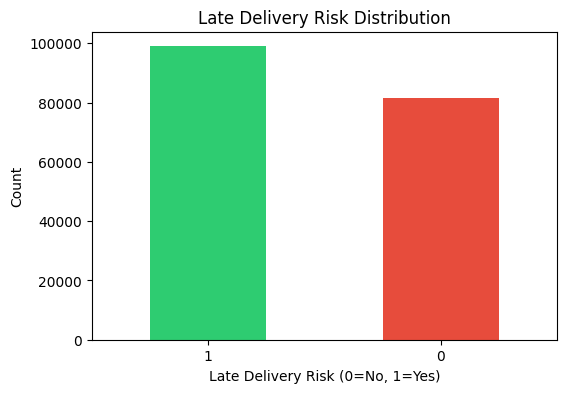

In [41]:
plt.figure(figsize=(6, 4))
data_final['Late_delivery_risk'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Late Delivery Risk Distribution')
plt.xlabel('Late Delivery Risk (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


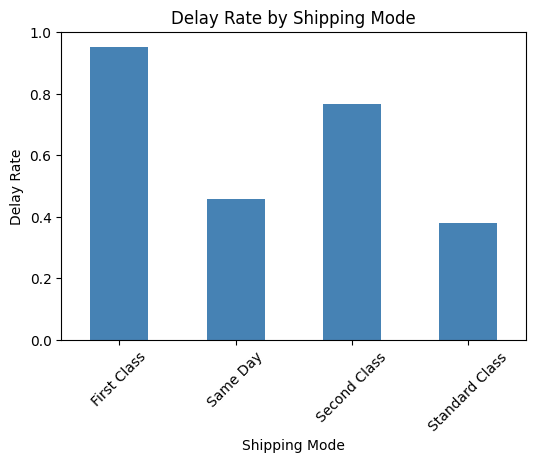

In [42]:
plt.figure(figsize=(6, 4))
shipping_analysis = data_final.groupby('Shipping Mode')['Late_delivery_risk'].mean()
shipping_analysis.plot(kind='bar', color='steelblue')
plt.title('Delay Rate by Shipping Mode')
plt.ylabel('Delay Rate')
plt.xticks(rotation=45)
plt.show()


ALTHOUGH THE FIRST CLASS MUST HAVE VERY LESS DELAY BUT OVER HERE THERE IS HIGH DELAY IN FIRST CLASS COMAPRED TO STANDARD CLASS WHICH IS LESS OUT OF ALL

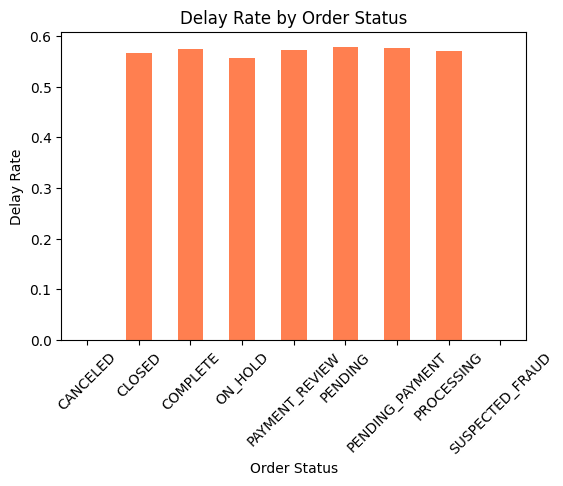

In [43]:
plt.figure(figsize=(6, 4))
status_analysis = data_final.groupby('Order Status')['Late_delivery_risk'].mean()
status_analysis.plot(kind='bar', color='coral')
plt.title('Delay Rate by Order Status')
plt.ylabel('Delay Rate')
plt.xticks(rotation=45)
plt.show()


DELAYS ARE VERY HIGH FOR ALMOST ALL  THE ORDER STATUSES

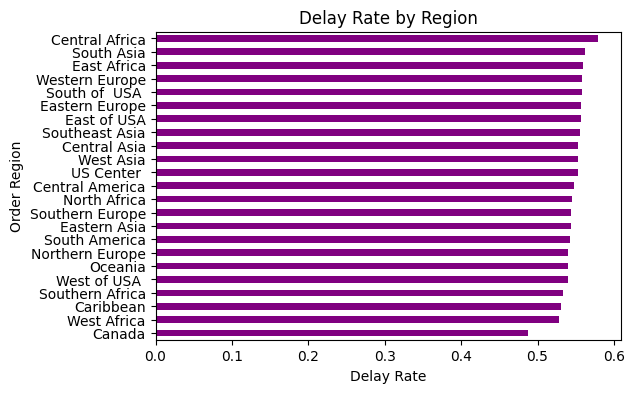

In [45]:
plt.figure(figsize=(6, 4))
region_analysis = data_final.groupby('Order Region')['Late_delivery_risk'].mean().sort_values()
region_analysis.plot(kind='barh', color='purple')
plt.title('Delay Rate by Region')
plt.xlabel('Delay Rate')
plt.show()


VERY REGIONS HAVE SIGNIFICANT DELAYS GREATER THAN 49% DELAYS IN EVERY REGIONS.

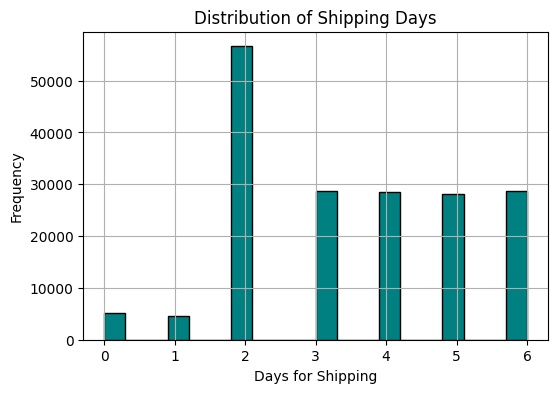

In [48]:
plt.figure(figsize=(6, 4))
data_final['Days for shipping (real)'].hist(bins=20, color='teal', edgecolor='black')
plt.title('Distribution of Shipping Days')
plt.xlabel('Days for Shipping')
plt.ylabel('Frequency')
plt.show()


WE CAN OBSERVE THAT MAJORITY OF ORDERS ARE SHIPPED IN 2 DAYS
SHIPPING TIMES CLUSTER AROUND @ to 6 DAYS WITH MUCH FEWER ORDERS SHIPPED IN 0 or 1 DAY.

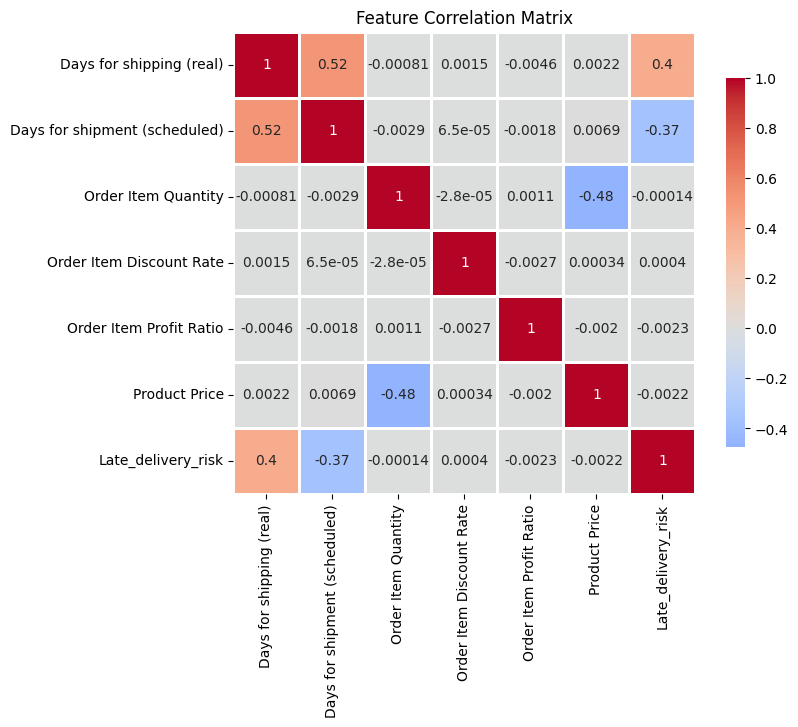

In [49]:
plt.figure(figsize=(8, 6))
numeric_cols = data_final.select_dtypes(include='number').columns
corr_matrix = data_final[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix')
plt.show()


DAYS FOR SHIPPING(REAL) AND LATE_DELIVERY_RISK HAVE A STRONG CORRELEATION
DAYS FOR SHIPMENT(SCHEDULED) CORRELATES NEGATIVELY WITH THE RISK SUGGESTING THAT ORDERS SCHEDULED FOR LONGER SHIPPING TIME ARE LESS LIKELY TO BE LATE.
OTHERS HAVE VERY LESS OR NO CORRELATION WITHT HE TARGET

**FEATURE ENGINEERING**

In [50]:
data = data_final.copy()

In [51]:
label_encoders = {}
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols

Index(['Shipping Mode', 'Order Status', 'Order Region', 'Delivery Status',
       'Order State', 'Category Name', 'shipping date (DateOrders)'],
      dtype='object')

In [53]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
for col in categorical_cols:
  if col in data.columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le


In [54]:
if 'Days for shipping (real)' in data and 'Days for shipment (scheduled)':
  data['Shipping_efficiency'] = data['Days for shipment (scheduled)'] / data['Days for shipping (real)']

In [61]:
if 'Product Price' in data.columns:
    data['Price_category'] = pd.cut(data['Product Price'],
                                      bins=[0, 100, 300, 500, float('inf')],
                                      labels=[0, 1, 2, 3])


In [62]:
if 'Order Item Discount Rate' in data.columns:
    data['High_discount_rate'] = (data['Order Item Discount Rate'] > data['Order Item Discount Rate'].median()).astype(int)



In [63]:
data.tail()

,Days for shipping (real),Days for shipment (scheduled),Shipping Mode,Order Status,Order Region,Delivery Status,Order State,Order Item Quantity,Order Item Discount Rate,Order Item Profit Ratio,Product Price,Category Name,shipping date (DateOrders),Late_delivery_risk,Shipping_efficiency,Price_category,High_discount_rate
180514,4,4,3,1,7,3,913,1,0.00,0.10,399.980011,18,20487,0,1.000000,2,0
180515,3,2,2,2,7,1,770,1,0.01,-1.55,399.980011,18,20264,1,0.666667,2,0
180516,5,4,3,5,11,1,88,1,0.02,0.36,399.980011,18,20481,1,0.800000,2,0
180517,3,4,3,6,11,0,88,1,0.03,0.48,399.980011,18,20039,0,1.333333,2,0
180518,4,4,3,6,13,3,967,1,0.04,0.44,399.980011,18,20259,0,1.000000,2,0


In [64]:
X = data.drop('Late_delivery_risk', axis=1)
y = data['Late_delivery_risk']


In [65]:
y.value_counts()

,count
Late_delivery_risk,
1,98977
0,81542


In [66]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify = y)


In [76]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)


In [78]:
import numpy as np
from sklearn.linear_model import LogisticRegression


X_train_scaled_cleaned = np.nan_to_num(X_train_scaled)
X_test_scaled_cleaned = np.nan_to_num(X_test_scaled)

model_lr = LogisticRegression()
model_lr.fit(X_train_scaled_cleaned, y_train)
y_pred_lr = model_lr.predict(X_test_scaled_cleaned)

In [82]:
y_pred_train = model_lr.predict(X_train_scaled_cleaned)
train_accuracy = accuracy_score(y_train,y_pred_train)
print(train_accuracy)

0.9972935115500582


In [79]:
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

Accuracy: 0.9972856193219588


In [81]:
confusion_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 [[24316   147]
 [    0 29693]]


TOP LEFT --> TN- On-time deliveries correctly predicted

TOP RIGHT --> FP - ON-Time incorrectly predicited as late.

BOTTOM LEFT --> FN - Late deliveries incorrectly predicted as on-time

BOTTOM RIGHT --> TP - late deliverires correctly predicted


In [85]:
cv_scores = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)


Cross-validation scores: [0.99738852 0.99742809 0.99730938 0.99730928 0.99703229]
Mean cross-validation accuracy: 0.9973
Standard deviation of cross-validation accuracy: 0.0001
